# ASSESSMENT Evil Geniuses x Genius League: Data Scientist

In [135]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

## 1. Exploratory Data Analysis

In [136]:
#read in dataset
starcraft = pd.read_csv("C:/Users/Anthony/Documents/code/eg/starcraft_player_data.csv")
starcraft.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### 1.1 Data Summary

In [137]:
#data summary
starcraft.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


We use the describe function to get a general overview of the dataset we will be working with alongside with its size.

In [138]:
#first check for any NaN values in df
starcraft.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

Luckily the provided dataset was already very clean, containing no NaN values. By checking with the isnull() function we see that there are no NaN values in our dataset and we can continue with our exploratory data analysis.

### 1.2 Exploratory Analysis - Visualizations

We will now create some basic visualizations to identify any outlier data points and that might affect our prediction model and to look for any notable trends/patterns that will help us create a better understanding of the dataset.

Creating visualizations will also help us identify which columns/predictors we will use as features for our models.

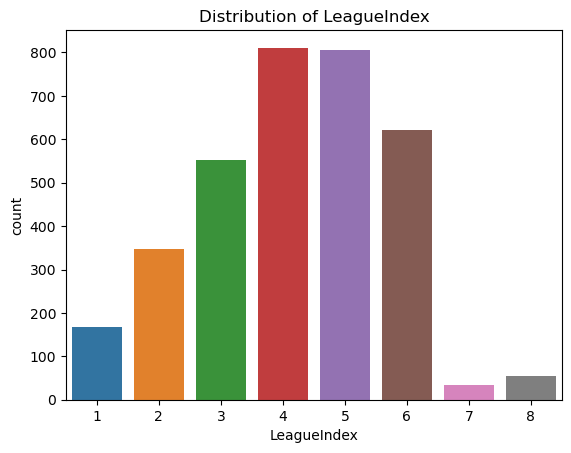

In [128]:
#distribution of variables-league index
sns.countplot(x='LeagueIndex', data=starcraft)
plt.title('Distribution of LeagueIndex')
plt.show()

A 'normal' distribution is shown for the LeagueIndex distribution. Note that there are significantly less players with a LeagueIndex of 7 and 8.

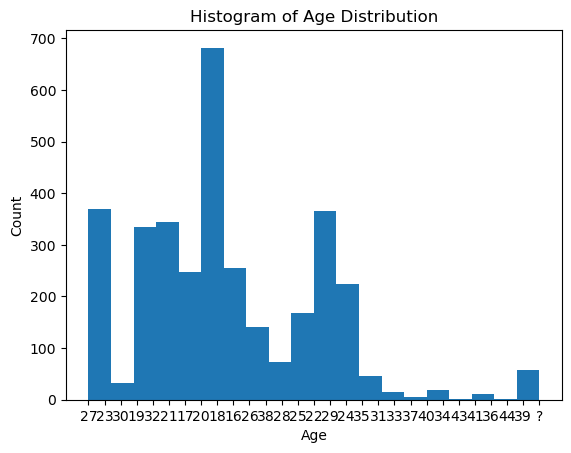

In [96]:
plt.hist(starcraft['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution')
plt.show()

Note: in the histogram showing age distribution, '?' is shown, indicating an unknown or place holder value for NaNs. This will be considered during the data processing/cleaning.
After further inspection of the dataset, the '?' value is also shown in the HoursPerWeek and TotalHours columns.

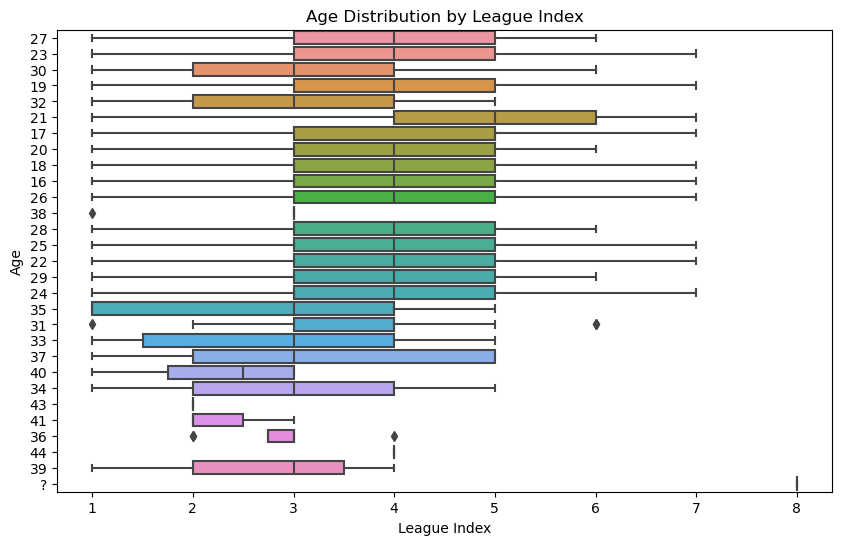

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=starcraft, x='LeagueIndex', y='Age')
plt.xlabel('League Index')
plt.ylabel('Age')
plt.title('Age Distribution by League Index')
plt.show()

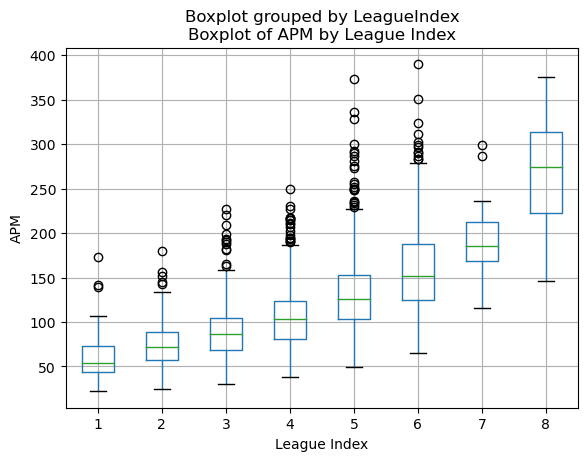

In [98]:
starcraft.boxplot(column='APM', by='LeagueIndex')
plt.xlabel('League Index')
plt.ylabel('APM')
plt.title('Boxplot of APM by League Index')
plt.show()

As shown by the box plot, it makes sense that the higher the LeagueIndex, the higher the APM. This is likely a good feature and predictor to predict a player's rank.

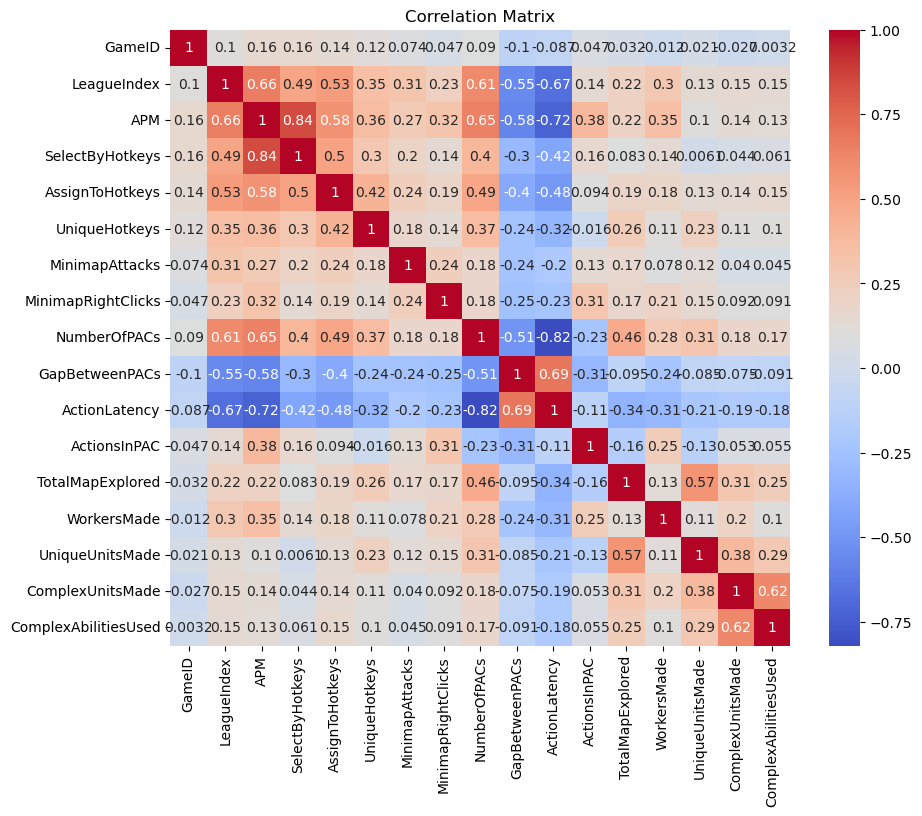

In [102]:
correlation_matrix = starcraft.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Above is a correlation matrix to show a general overview of the possible relationships between the different columns/possible predictors. From this, we can easily see which predictors are most likely the best to use with some notable ones being APM, NumberofPACs, GAPBetweenPACs, ActionLatency, SelectByHotkeys, and AssignToHotkeys.

## 2. Data Cleansing and Preprocessing

In [103]:
#first check for any NaN values in df
starcraft.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

As shown in the EDA, our dataset does not have any NaN values; however, there are some 'missing' or place holder values denoted as '?' in the following columns: Age, HoursPerWeek, and TotalHours. Note that the columns that have the '?' value are only present to players with a LeagueIndex of 8 (Professional).

Due to possible issues that we may run into during the model building process and the fact that we will be making predictions on a player's rank, the Age, HoursPerWeek, and TotalHours columns are insignificant for our model and thus not included as features.

In [104]:
#drop Age, HoursPerWeek, and TotalHours
starcraft = starcraft.drop(["Age", "HoursPerWeek", "TotalHours"], axis=1)

In [105]:
#our new starcraft dataframe
starcraft.head()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### 2.1 Standardizing the Data

Here we will further process our data. We will standardize it and fix the skewness to improve our model performance.

We confirmed multiple times that APM is a strong predictor and possible feature for our models so we will fit it and plot its distribution.

KeyError: 'Actions per Minute'

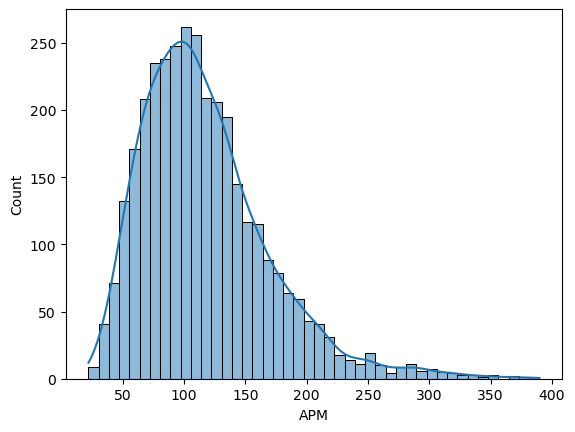

In [139]:
sns.histplot(starcraft['APM'], kde=True);
(mu, sigma) = norm.fit(starcraft['Actions per Minute'])

plt.ylabel('Frequency')
plt.title('APM')
plt.show()

We see from the distribution that the APM distribution is heavily right-skewed.

We will not check the skewness for the other columns.

In [86]:
numeric_feats = starcraft.dtypes[starcraft.dtypes != "object"].index
skewed_feats = starcraft[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(17)

,Skew
MinimapAttacks,4.805009
ComplexAbilitiesUsed,3.769857
SelectByHotkeys,2.895117
MinimapRightClicks,2.554812
ComplexUnitsMade,2.299453
WorkersMade,1.654694
AssignToHotkeys,1.138400
NumberOfPACs,0.543294
ActionsInPAC,0.010094
ActionLatency,-0.053250


As shown above, there are different levels of skew in all features. We will improve this with Log-Log Transformation

In [112]:
skew_threshold = 0.5
skewed_features = skewness[abs(skewness) > skew_threshold]
print("{} skewed features".format(skewed_features.shape[0]))

lambda_value = 0.25
for feat in skewed_features.index:
    starcraft[feat] = np.log1p(starcraft[feat])

17 skewed features


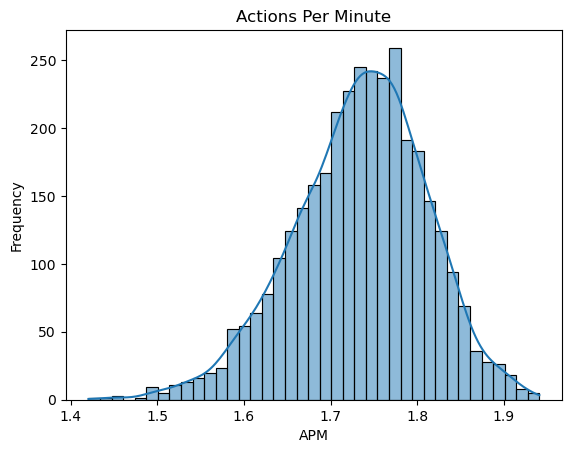

In [110]:
sns.histplot(starcraft['APM'] , kde=True);
(mu, sigma) = norm.fit(starcraft['APM'])
plt.ylabel('Frequency')
plt.title('Actions Per Minute')
plt.show()

Performing Log-Log Transformation drastically improved the skewness of our data with the example of APM shown above. This will help normalize our data.

## 3. Model Building

### 3.1 Feature Engineering

As discussed in the EDA, we were able to determine from the numerous plots, including the correlation plot, that the best predictors and feautures we will use are APM, NumberofPACs, GAPBetweenPACs, ActionLatency, SelectByHotkeys, and AssignToHotkeys

In [113]:
features = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency']

#convert the continuous labels to categorical labels.
le = LabelEncoder()
labels = le.fit_transform(starcraft['LeagueIndex'])

X = starcraft[features] 
y = labels  #convert LeagueIndex to string type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.2 Model Selection and Training

In [116]:
#removing warnings to make outputs cleaner
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [130]:
#Random Forest Classifier
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier())
])

rf_param_grid = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [None, 5, 10],
    "rf__min_samples_split": [2, 5, 10]
}

rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train_scaled, y_train)

#Logistic Regression
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression())
])

lr_param_grid = {
    "lr__C": [0.1, 1.0, 10.0],
    "lr__solver": ["liblinear", "saga"]
}

lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_param_grid, cv=5)
lr_grid_search.fit(X_train_scaled, y_train)

#XGBoost
xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBClassifier())
])

xgb_param_grid = {
    "xgb__learning_rate": [0.1, 0.3, 0.5],
    "xgb__max_depth": [3, 5, 7],
    "xgb__n_estimators": [100, 200, 300]
}

xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_scaled, y_train)

#Neural Network
nn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("nn", MLPClassifier())
])

nn_param_grid = {
    "nn__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "nn__activation": ["relu", "tanh"],
    "nn__solver": ["adam", "sgd"],
    "nn__alpha": [0.0001, 0.001, 0.01]
}

nn_grid_search = GridSearchCV(nn_pipeline, param_grid=nn_param_grid, cv=5)
nn_grid_search.fit(X_train_scaled, y_train)

#Support Vector Machine
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

svm_param_grid = {
    "svm__C": [0.1, 1.0, 10.0],
    "svm__kernel": ["linear", "rbf"],
    "svm__gamma": ["scale", "auto"]
}

svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1.0, 10.0],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']})

When building our models, we use multiple parameters and grid search for hyperparameter tuning with pipelines.

### 3.3 Model Evaluation and Comparison

In [132]:
#Random Forest Classifier
y_pred_rf = rf_grid_search.predict(X_test_scaled)

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(confusion_matrix_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, zero_division=1)
print("Random Forest Classifier Classification Report:\n", classification_rep_rf)

#Logistic Regression
y_pred_lr = lr_grid_search.predict(X_test_scaled)

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr, zero_division=1)
print("Logistic Regression Classification Report:\n", classification_rep_lr)

#XGBoost
y_pred_xgb = xgb_grid_search.predict(X_test_scaled)

confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(confusion_matrix_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, zero_division=1)
print("XGBoost Classification Report:\n", classification_rep_xgb)

#Neural Network
y_pred_nn = nn_grid_search.predict(X_test_scaled)

confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Neural Network Confusion Matrix:")
print(confusion_matrix_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)
classification_rep_nn = classification_report(y_test, y_pred_nn, zero_division=1)
print("Neural Network Classification Report:\n", classification_rep_nn)

# SVM Classifier
y_pred_svm = svm_grid_search.predict(X_test_scaled)

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(confusion_matrix_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=1)
print("SVM Classification Report:\n", classification_rep_svm)

Random Forest Confusion Matrix:
[[11  9  7  4  0  0  0  0]
 [ 8 19 25 26  2  0  0  0]
 [ 4 13 30 51 12  2  0  0]
 [ 0  7 30 74 48  8  0  0]
 [ 0  3  6 57 49 43  0  0]
 [ 0  0  0 17 44 56  0  0]
 [ 0  0  0  0  1  2  0  1]
 [ 0  0  0  0  0  6  0  4]]
Random Forest Classifier Accuracy: 0.35787923416789397
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.35      0.41        31
           1       0.37      0.24      0.29        80
           2       0.31      0.27      0.29       112
           3       0.32      0.44      0.37       167
           4       0.31      0.31      0.31       158
           5       0.48      0.48      0.48       117
           6       1.00      0.00      0.00         4
           7       0.80      0.40      0.53        10

    accuracy                           0.36       679
   macro avg       0.51      0.31      0.34       679
weighted avg       0.37      0.36      0.35       6

In [133]:
#Random Forest Classifier
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest")
print("Train MSE:", mean_squared_error(y_train, rf_grid_search.predict(X_train_scaled)))
print("Test MSE:", mse_rf)
print()

#Logistic Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Logistic Regression")
print("Train MSE:", mean_squared_error(y_train, lr_grid_search.predict(X_train_scaled)))
print("Test MSE:", mse_lr)
print()

#XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost")
print("Train MSE:", mean_squared_error(y_train, xgb_grid_search.predict(X_train_scaled)))
print("Test MSE:", mse_xgb)
print()

#Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network")
print("Train MSE:", mean_squared_error(y_train, nn_grid_search.predict(X_train_scaled)))
print("Test MSE:", mse_nn)
print()

#SVM Classifier
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Support Vector Machine")
print("Train MSE:", mean_squared_error(y_train, svm_grid_search.predict(X_train_scaled)))
print("Test MSE:", mse_svm)

Random Forest
Train MSE: 1.089101620029455
Test MSE: 1.187039764359352

Logistic Regression
Train MSE: 1.164580265095729
Test MSE: 1.159057437407953

XGBoost
Train MSE: 1.0231958762886597
Test MSE: 1.2989690721649485

Neural Network
Train MSE: 1.1730486008836525
Test MSE: 1.1855670103092784

Support Vector Machine
Train MSE: 1.1189248895434463
Test MSE: 1.1620029455081002


## 4. Results

### 4.1 Key Findings

For our experiment in predicting a Starcraft player's rank, we used the following classification models: random forest, logistic regression, XGBoost, KNN, neural network, and SVMs.

From our results above, we see that all of the models' accuracies are similar ranging from 0.30 to 0.38, which are not the most accurate. The best/highest accuracies amongst our models are SVM with 0.3726 and the lowest accuracy being random forest with 0.3476.

As stated above, the model with the best accuracy was SVM with 0.3726; however, the XGBoost model comes very close with a classification accuracy of 0.3623. In addition, the XGBoost model has the best metrics in terms of train MSE and test MSE with the greatest difference between the two being 0.2758, and the XGBoost model having the lowest train MSE out of all the models. With these findings, we determine that the XGBoost model is our best model for predicting a Starcraft player's rank and thus our chosen model.

### 4.2 Interpretation of Results

The models reveal that the available features have a limited ability to predict player ranks accurately. Our analysis highlights the challenges associated with this prediction task, including the complex nature of Starcraft gameplay and the diverse factors contributing to player performance.

Despite the accuracies, all of our models showed a significantly higher value for the F1 scores in the 7th cluster, or LeagueIndex 8 (Professional) meaning our models better predicted players at the highest skill level. This is likely due to the fact that there were significantly less data points for the highest level of players and that they are much easier to identify with the features we have chosen.

Furthermore, for cluster 6 or LeagueIndex 7 (GrandMaster), it is important to note that our Precisions and F1 scores are ill-defined and are automatically being set to 0.0 in labels with no predicted samples. This is likely due to the fact that there are very few data points for the GrandMaster rank. Recall back to the EDA where we originally plotted the distribution/count of LeagueIndex's. It is evident from the plot that we have the fewest data points/players in the GrandMaster rank, 35 values. Thus, it is important to note that with the Precisions and F1 scores being set to 0.0 for LeagueIndex 7, the calculated averages of the scores are signicicantly lowered. 


### 4.3 Limitations

As discussed, a major limitation was the size of our dataset. The problem was most notable in the small sample size of the GrandMaster ranked players. With a larger dataset with more players, the performance of our models could improve. The fact that the distribution/number of players in each of the Leagues were so different, our data was heavily imbalanced which lead to difficulty in making accurate predictions.

Moreover, since for LeagueIndex 8 the Age, HoursPerWeek, and TotalHours columns were filled with a filler value of '?' we were not able to use those features in our models.

## 5. Hypothetical Situation

#### Hypothetical: after seeing your work, your stakeholders come to you and say that they can collect more data, but want your guidance before starting. How would you advise them based on your EDA and model results?

Starcraft was released in 1998; we need to ensure that the new data is directly related to the prediction task of player ranks. Identify potential gaps in the current dataset and focus on collecting features that could provide additional insights into player performance. Even with a quick glance, some of the existing features have many values with 0.0 or either a significantly small range throughout the different Leagues. This also contributes to a more difficult time in predicting a player's rank. We must identify areas where the current dataset may lack comprehensive coverage of features. Collaborate with domain experts to determine additional features that may be relevant to player performance, such as game strategies, player actions, or different specific gameplay metrics. On the contrary, through our EDA and correlation matrix, we identified features that have a high correlation to LeagueIndex and thus chosen for our models. For example, if certain features were found to be highly correlated with player ranks, collecting more data related to those features could be beneficial.

Consulting experts in the game will also help. Engage with domain experts who possess a deep understanding of Starcraft gameplay and the factors influencing player ranks. Their expertise will be invaluable in guiding data collection efforts, feature engineering, and refining the model. Identifying any changes in the meta since the last dataset and if it is measurable and if so, collect the data. 

Also assuming that the data is open source, try to gather more data than compared to the last. Further ensure that there is a near equivalent number or higher number of player data for the higher and lower ranks. This is achievable by creating a combined, large dataset of players with their data and LeagueIndex values across multiple Ladder seasons. This will allow us to gather more data points for the higher and lower ranks. GameID is not significant in predicting rank so this will not be an issue; the GameID is not the same player last season and next season as their skills and stats improve or worsen resulting in different values and "players."

Emphasize the importance of collecting high-quality data. Establish data collection protocols and implement rigorous data validation techniques to ensure accuracy and reliability.

From the provided information and suggestions of collecting more and new data, we can then repeat the EDA, preprocessing, model training, and evaluation steps to assess the impact of the new data on the model's performance.
By comparing the model performance before and after incorporating the new data, we can measure the improvement in predictions and provide insights into the variables that contribute most significantly to the model's accuracy.